In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from helpers import get_confusion_matrix, plot_confusion_matrix, plot_decision_boundary

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
# PARAMETERS:
n = 100
input_size = 2
hidden_size = 4
num_classes = 2
num_epochs = 10
batch_size = 1
learning_rate = 0.1

In [4]:
from load_linearData import getLinearDataLoader
from StochasticBinaryModel import StochasticBinaryModel, run_model

train_data, test_data, train, test = \
    getLinearDataLoader(n=n, d=num_classes, sigma = 0.15, test_split = 0.2, batch_size = batch_size, num_workers = 5)
    
#run_model(input_size = input_size,hidden_size=hidden_size, num_classes=num_classes, num_epochs=num_epochs,
#    batch_size=batch_size, learning_rate=learning_rate,
#    train_loader=train,
#    test_loader=test)

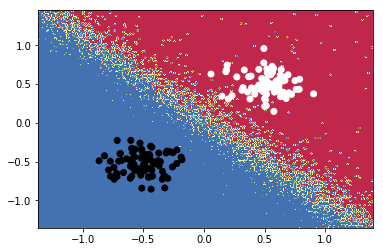

In [5]:
#load the model back
model = StochasticBinaryModel(input_size, hidden_size, num_classes)
state_dict = torch.load('/home/bjk224/BSNN/linear_data/models/model.ckpt')
model.load_state_dict(state_dict)
#helpers.py
plot_decision_boundary(model.predict, train_data.inputs, train_data.labels)

# IRIS Dataset

In [24]:
from load_iris import getIrisDataLoader
from IrisModel import IrisModel, run_model

trainData, testData, train, test = getIrisDataLoader()
num_epochs = 100
batch_size = 4
learning_rate = 0.001
#run_model(num_epochs=num_epochs, \
#          batch_size=batch_size, \
#          learning_rate=learning_rate, \
#          train_loader = train, test_loader = test)


In [25]:
for batch_idx, (inputs, labels) in enumerate(train):
    print(batch_idx)
    print(inputs,labels)

0
tensor([[4.6000, 3.6000, 1.0000, 0.2000]], dtype=torch.float64) tensor([0])
1
tensor([[5.7000, 4.4000, 1.5000, 0.4000]], dtype=torch.float64) tensor([0])
2
tensor([[6.7000, 3.1000, 4.4000, 1.4000]], dtype=torch.float64) tensor([1])
3
tensor([[4.8000, 3.4000, 1.6000, 0.2000]], dtype=torch.float64) tensor([0])
4
tensor([[4.4000, 3.2000, 1.3000, 0.2000]], dtype=torch.float64) tensor([0])
5
tensor([[6.3000, 2.5000, 5.0000, 1.9000]], dtype=torch.float64) tensor([2])
6
tensor([[6.4000, 3.2000, 4.5000, 1.5000]], dtype=torch.float64) tensor([1])
7
tensor([[5.2000, 3.5000, 1.5000, 0.2000]], dtype=torch.float64) tensor([0])
8
tensor([[5.0000, 3.6000, 1.4000, 0.2000]], dtype=torch.float64) tensor([0])
9
tensor([[5.2000, 4.1000, 1.5000, 0.1000]], dtype=torch.float64) tensor([0])
10
tensor([[5.8000, 2.7000, 5.1000, 1.9000]], dtype=torch.float64) tensor([2])
11
tensor([[6.0000, 3.4000, 4.5000, 1.6000]], dtype=torch.float64) tensor([1])
12
tensor([[6.7000, 3.1000, 4.7000, 1.5000]], dtype=torch.floa

Accuracy:  0.9333333333333333
Accuracy:  0.9666666666666667
[[40  0  0]
 [ 0 35  6]
 [ 0  2 37]]
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


<Figure size 432x288 with 0 Axes>

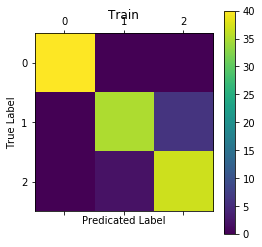

<Figure size 432x288 with 0 Axes>

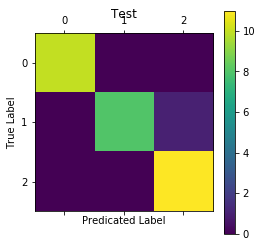

In [47]:
#load the model back
from IrisNet import IrisNet
model = IrisNet()
state_dict = torch.load('/home/bjk224/BSNN/linear_data/models/iris/iris_BSNN.pt')
model.load_state_dict(state_dict)

cm_train = get_confusion_matrix(trainData.labels, model.predict(trainData.inputs))
cm_test = get_confusion_matrix(testData.labels, model.predict(testData.inputs))

print(cm_train)
print(cm_test)
#helpers.py
plot_confusion_matrix(cm_train, "Train", 'iris_train')
plot_confusion_matrix(cm_test, "Test", 'iris_test')

# MNIST Dataset

Epoch [1/1], Step [10/938], Loss: 2.5410
Epoch [1/1], Step [20/938], Loss: 2.4339
Epoch [1/1], Step [30/938], Loss: 2.4004
Epoch [1/1], Step [40/938], Loss: 2.4344
Epoch [1/1], Step [50/938], Loss: 2.3190
Epoch [1/1], Step [60/938], Loss: 2.3930
Epoch [1/1], Step [70/938], Loss: 2.4604
Epoch [1/1], Step [80/938], Loss: 2.4501
Epoch [1/1], Step [90/938], Loss: 2.4498
Epoch [1/1], Step [100/938], Loss: 2.4027
Epoch [1/1], Step [110/938], Loss: 2.4533
Epoch [1/1], Step [120/938], Loss: 2.3512
Epoch [1/1], Step [130/938], Loss: 2.4414
Epoch [1/1], Step [140/938], Loss: 2.4213
Epoch [1/1], Step [150/938], Loss: 2.2893
Epoch [1/1], Step [160/938], Loss: 2.4475
Epoch [1/1], Step [170/938], Loss: 2.3433
Epoch [1/1], Step [180/938], Loss: 2.4724
Epoch [1/1], Step [190/938], Loss: 2.4296
Epoch [1/1], Step [200/938], Loss: 2.4367
Epoch [1/1], Step [210/938], Loss: 2.4590
Epoch [1/1], Step [220/938], Loss: 2.3172
Epoch [1/1], Step [230/938], Loss: 2.3411
Epoch [1/1], Step [240/938], Loss: 2.3849
E

<Figure size 432x288 with 0 Axes>

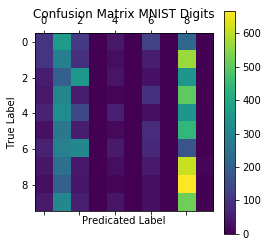

In [9]:
from MNISTModel import MNISTModel, run_model
from load_MNIST import getMNISTDataLoader

mnist_train, mnist_test, train, test = getMNISTDataLoader()
num_epochs = 1
learning_rate = 0.001
run_model(num_epochs=num_epochs, \
          learning_rate=learning_rate, \
          train_loader = train, test_loader = test)

In [ ]:
##load the model back
#model = MNISTModel()
#state_dict = torch.load('/home/bjk224/BSNN/linear_data/models/MNIST_model.ckpt')
#model.load_state_dict(state_dict)

In [31]:
from sklearn import datasets
iris = datasets.load_iris()

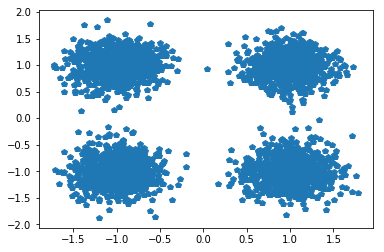

In [22]:
from load_XORData import getDataLoader
trainData, testData, train, test = getDataLoader(n = 1000, d=2, sigma= 0.25)
plt.plot(trainData.inputs[:,0], trainData.inputs[:,1], 'p')
plt.show()